In [1]:
from random import choices
import numpy as np
from math import erf

def non_parametric_bootstrap(X, T, num_sim=1000, interval="pivot", confidence=.95):
    """
    Bootstrap a test statistic and generate a confidence interval.
    
    Args:
        X: (np.array) the data to be sampled
        T: (function) the test statistic to be estimated
        n_sim: (int) the number of bootstrap samples to generate
        interval: (str) the type of confidence interval to compute
            normal: assumes the bootstrapped statistic is normally distributed
            pivot: uses quantiles to estimate the bias of the statistic, more general method
        confidence: (float) the power of the confidence interval
        
    Returns:
        confidence interval corresponding to the designated confidence level
    """
    bootstrap_samples = np.zeros(num_sim)
    test_statistic = T(X)
    num_data = X.shape[0]
    alpha = 1-confidence
    
    
    for i in range(num_sim):
        indices = np.random.randint(0, num_data, num_data)
        sample = X[indices]
        bootstrap_samples[i] = T(sample)
        
    bootstrap_stan_err = np.sqrt(bootstrap_samples.var())
    
    if interval == "normal":
        z_alpha = erf(1-alpha/2)
        left = test_statistic-z_alpha*bootstrap_stan_err
        right = test_statistic+z_alpha*bootstrap_stan_err
        return (left, right)
    
    elif interval == "pivot":
        left = 2*test_statistic - np.quantile(bootstrap_samples, 1-alpha/2)
        right = 2*test_statistic - np.quantile(bootstrap_samples, alpha/2)
        return (left, right)
    
    else:
        raise ValueError("Unknown interval type")
        

Text(0.5, 1.0, 'Small sample normal distribution')

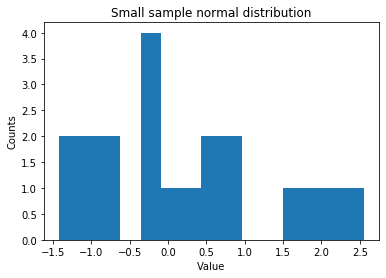

In [2]:
import matplotlib.pyplot as plt
sample = np.random.normal(size=20)
plt.hist(sample,bins=15)
plt.xlabel("Value")
plt.ylabel("Counts")
plt.title("Small sample normal distribution")

In [3]:
sample.mean()

0.20133480479131496

In [5]:
non_parametric_bootstrap(sample, lambda x:x.mean())

(-0.31567077318818587, 0.6657581450103071)